In [1]:
# Import required packages
import matplotlib.pyplot as plt
import pandas as pd
from datacube import Datacube
from odc.ui import DcViewer
from pprint import pprint
from odc.geo import resxy_

# Set some configurations for displaying tables nicely
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', None)

In [2]:
# Connect to datacube
dc = Datacube(app="Products_and_measurements")

## Product Discovery

In [3]:
# List Products
dc.list_products()

/home/venv/lib/python3.12/site-packages/datacube/utils/py.py:62: ODC2DeprecationWarning: Call to deprecated function (or staticmethod) grid_spec. (The Grid Workflow is deprecated. This property may return an (optional) odc-geo GridSpec in future.)
-- Deprecated since version 1.9.0.
  value = obj.__dict__[self.func.__name__] = self.func(obj)


,name,description,license,default_crs,default_resolution
name,,,,,
sentinel_2_l2a,sentinel_2_l2a,"Sentinel-2a and Sentinel-2b imagery, processed to Level 2A (Surface Reflectance) and converted to Cloud Optimized GeoTIFFs",None,None,None


In [4]:
# List measurements
dc.list_measurements()

name   dtype units  nodata  \
product        measurement                                   
sentinel_2_l2a coastal       coastal  uint16     1       0   
               blue             blue  uint16     1       0   
               green           green  uint16     1       0   
               red               red  uint16     1       0   
               rededge1     rededge1  uint16     1       0   
               rededge2     rededge2  uint16     1       0   
               rededge3     rededge3  uint16     1       0   
               nir               nir  uint16     1       0   
               nir08           nir08  uint16     1       0   
               nir09           nir09  uint16     1       0   
               swir16         swir16  uint16     1       0   
               swir22         swir22  uint16     1       0   
               scl               scl   uint8     1       0   
               aot               aot  uint16     1       0   
               wvp               wvp  uint16     1       0   

                                                      aliases  \
product        measurement                                      
sentinel_2_l2a coastal        [band_01, B01, coastal_aerosol]   
               blue                            [band_02, B02]   
               green                    [band_03, B03, green]   
               red                        [band_04, B04, red]   
               rededge1            [band_05, B05, red_edge_1]   
               rededge2            [band_06, B06, red_edge_2]   
               rededge3            [band_07, B07, red_edge_3]   
               nir                 [band_08, B08, nir, nir_1]   
               nir08        [band_8a, B8A, nir_narrow, nir_2]   
               nir09             [band_09, B09, water_vapour]   
               swir16         [band_11, B11, swir_1, swir_16]   
               swir22         [band_12, B12, swir_2, swir_22]   
               scl                            [mask, SCL, qa]   
               aot           [aerosol_optical_thickness, AOT]   
               wvp          [scene_average_water_vapour, WVP]   

                                                                                                                                                                                                                   flags_definition  
product        measurement                                                                                                                                                                                                           
sentinel_2_l2a coastal                                                                                                                                                                                                          NaN  
               blue                                                                                                                                                                                                             NaN  
               green                                                                                                                                                                                                            NaN  
               red                                                                                                                                                                                                              NaN  
               rededge1                                                                                                                                                                                                         NaN  
               rededge2                                                                                                                                                                                                         NaN  
               rededge3        

## Dataset Searching & Querying

### Finding Dataset

In [5]:
datasets = dc.find_datasets(product="sentinel_2_l2a", limit=1)
datasets

Querying product Product(name='sentinel_2_l2a', id_=1)


[Dataset <id=cfe19183-a228-5d78-be00-9f0831500cee product=sentinel_2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2B_50LKR_20250225_0_L2A>]

We can also search for datasets within a specific spatial extent or time period. To do this, we supply a spatiotemporal query (i.e. a range of x- and y-coordinates defining the spatial area to load, and a range of times).

`dc.find_datasets()` will then return a subset of datasets that match this query:

In [6]:
datasets = dc.find_datasets(
    product="sentinel_2_l2a",
    x=(114, 116),
    y=(-7, -9),
    time=("2020-01-01", "2020-01-02")
)
datasets

Querying product Product(name='sentinel_2_l2a', id_=1)


[Dataset <id=46baf1fe-7110-58ba-9dac-87f898318bf2 product=sentinel_2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50LKR_20200101_1_L2A>,
 Dataset <id=19039e22-9aa3-5fcf-b1cc-eedba919b3c8 product=sentinel_2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_49MHN_20200101_0_L2A>,
 Dataset <id=6c9f52ea-fd5d-56be-be9e-24adbd890035 product=sentinel_2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_49MHM_20200101_1_L2A>,
 Dataset <id=d1a8d33b-82b9-5e94-bd0f-93f00e9b6bdf product=sentinel_2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50MKT_20200101_1_L2A>,
 Dataset <id=1909206c-d291-5512-9a1e-fe583c16a62e product=sentinel_2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50MLS_20200101_1_L2A>,
 Dataset <id=0226cd45-2ffb-5c30-b709-296e13478303 product=sentinel_2_l2a locatio

### Inspecting Dataset

In [7]:
datasets[0].uris

/tmp/ipykernel_81/1531116856.py:1: ODC2DeprecationWarning: Call to deprecated function (or staticmethod) uris. (Multiple locations are now deprecated. Please use the 'uri' attribute instead.)
-- Deprecated since version 1.9.0.
  datasets[0].uris


['https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50LKR_20200101_1_L2A']

In [8]:
datasets[0].measurements

{'aot': {'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/L/KR/2020/1/S2A_50LKR_20200101_1_L2A/AOT.tif'},
 'nir': {'grid': 'g10',
  'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/L/KR/2020/1/S2A_50LKR_20200101_1_L2A/B08.tif'},
 'red': {'grid': 'g10',
  'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/L/KR/2020/1/S2A_50LKR_20200101_1_L2A/B04.tif'},
 'scl': {'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/L/KR/2020/1/S2A_50LKR_20200101_1_L2A/SCL.tif'},
 'wvp': {'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/L/KR/2020/1/S2A_50LKR_20200101_1_L2A/WVP.tif'},
 'blue': {'grid': 'g10',
  'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/L/KR/2020/1/S2A_50LKR_20200101_1_L2A/B02.tif'},
 'green': {'grid': 'g10',
  'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/50/L/KR

In [9]:
datasets[0].crs

CRS('EPSG:32750')

In [10]:
datasets[0].transform

Affine(109800.0, 0.0, 199980.0,
       0.0, -109800.0, 9100000.0)

In [11]:
# attributes and methods that are available
ds0 = datasets[0]
dir(ds0.metadata)

['cloud_cover',
 'creation_dt',
 'creation_time',
 'dataset_maturity',
 'format',
 'grid_spatial',
 'id',
 'instrument',
 'label',
 'lat',
 'lon',
 'measurements',
 'platform',
 'product_family',
 'region_code',
 'sources',
 'time']

In [12]:
ds0.metadata.cloud_cover

99.995315

In [13]:
getattr(ds0.metadata, 'cloud_cover')

99.995315

In [14]:
ds0.metadata.id

'46baf1fe-7110-58ba-9dac-87f898318bf2'

In [15]:
ds0.metadata.lat

Range(begin=-9.131078481612201, end=-8.132907839951939)

In [16]:
ds0.metadata.lat.begin

-9.131078481612201

In [17]:
# pprint(vars(ds0))

## Load Data
Once you know the products or datasets that you are interested in, you can load data using `dc.load()`.

In [18]:
datasets_2 = dc.find_datasets(
    product="sentinel_2_l2a",
    x=(114, 115),
    y=(-7, -8),
    time=("2020-01-01", "2020-01-02")
)
datasets_2

Querying product Product(name='sentinel_2_l2a', id_=1)


[Dataset <id=6c9f52ea-fd5d-56be-be9e-24adbd890035 product=sentinel_2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_49MHM_20200101_1_L2A>,
 Dataset <id=2a2bcb13-5aa4-5b4a-a4c8-a63782f9d439 product=sentinel_2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_49MHM_20200101_0_L2A>,
 Dataset <id=19039e22-9aa3-5fcf-b1cc-eedba919b3c8 product=sentinel_2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_49MHN_20200101_0_L2A>,
 Dataset <id=d1a8d33b-82b9-5e94-bd0f-93f00e9b6bdf product=sentinel_2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_50MKT_20200101_1_L2A>,
 Dataset <id=d9b2935e-7564-5ffe-ba88-2372560ec0a7 product=sentinel_2_l2a location=https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_49MHN_20200101_1_L2A>,
 Dataset <id=7e441e3d-5c46-5158-99f3-92e9bc3d07d8 product=sentinel_2_l2a locatio

In [19]:
from pyproj import CRS
crs = CRS("EPSG:9468")
print("Projected:", crs.is_projected, "Geographic:", crs.is_geographic)
print(crs)

Projected: False Geographic: False
EPSG:9468


In [20]:
pprint(datasets_2[0].measurements)

{'aot': {'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/49/M/HM/2020/1/S2A_49MHM_20200101_1_L2A/AOT.tif'},
 'aot-jp2': {'path': 's3://sentinel-s2-l2a/tiles/49/M/HM/2020/1/1/1/AOT.jp2'},
 'blue': {'grid': 'g10',
          'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/49/M/HM/2020/1/S2A_49MHM_20200101_1_L2A/B02.tif'},
 'blue-jp2': {'grid': 'g10',
              'path': 's3://sentinel-s2-l2a/tiles/49/M/HM/2020/1/1/1/B02.jp2'},
 'coastal': {'grid': 'g60',
             'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/49/M/HM/2020/1/S2A_49MHM_20200101_1_L2A/B01.tif'},
 'coastal-jp2': {'grid': 'g60',
                 'path': 's3://sentinel-s2-l2a/tiles/49/M/HM/2020/1/1/1/B01.jp2'},
 'green': {'grid': 'g10',
           'path': 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/49/M/HM/2020/1/S2A_49MHM_20200101_1_L2A/B03.tif'},
 'green-jp2': {'grid': 'g10',
               'path': 's

In [21]:
print("Available measurements:")
for meas in datasets_2[0].measurements.keys():
    print(meas)

Available measurements:
aot
nir
red
scl
wvp
blue
green
nir08
nir09
swir16
swir22
visual
aot-jp2
coastal
nir-jp2
red-jp2
scl-jp2
wvp-jp2
blue-jp2
rededge1
rededge2
rededge3
green-jp2
nir08-jp2
nir09-jp2
swir16-jp2
swir22-jp2
visual-jp2
coastal-jp2
rededge1-jp2
rededge2-jp2
rededge3-jp2


In [22]:
ds2 = dc.load(
    datasets=datasets_2,
    measurements= ["red", "blue", "green"],
    output_crs="EPSG:4326", #because EPSG:9468 doesn't work here
    resolution=resxy_(-0.01, 0.01)
)

In [23]:
ds2

<xarray.Dataset> Size: 1MB
Dimensions:      (time: 6, latitude: 192, longitude: 158)
Coordinates:
  * time         (time) datetime64[ns] 48B 2020-01-01T02:49:36.979000 ... 202...
  * latitude     (latitude) float64 2kB -8.225 -8.215 -8.205 ... -6.325 -6.315
  * longitude    (longitude) float64 1kB 115.3 115.3 115.3 ... 113.7 113.7 113.7
    spatial_ref  int32 4B 4326
Data variables:
    red          (time, latitude, longitude) uint16 364kB 0 0 0 0 0 ... 0 0 0 0
    blue         (time, latitude, longitude) uint16 364kB 0 0 0 0 0 ... 0 0 0 0
    green        (time, latitude, longitude) uint16 364kB 0 0 0 0 0 ... 0 0 0 0
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

We can see that `dc.load` has returned an `xarray.Dataset` containing data from our two input datasets. 

> This `xarray.Dataset` includes:  
> **Dimensions**  
> This header identifies the number of timesteps returned (time: 2) as well as the number of resulting pixels in the `x` and `y` directions.
> 
> **Coordinates**  
> - time identifies the time attributed to each returned timestep.
> - x and y provide coordinates for each pixel within the returned data.  
> - spatial_ref provides information about the spatial grid used to load the data
> 
>**Data variables**  
> These are the measurements available for the loaded product.
> For every timestep (time) returned by the query, the measured value at each pixel (y, x) is returned as an array for each measurement.
> Each data variable is itself an `xarray.DataArray` object.
> 
> **Attributes**  
> Other important metadata or attributes for the loaded data

We can also inspect our loaded data by plotting it:

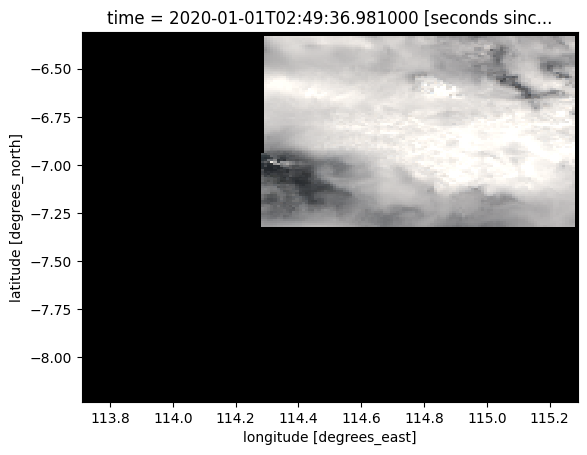

In [24]:
# Plot the data (using the correct variable name)
ds2.isel(time=1)[["red", "green", "blue"]].to_array().plot.imshow(robust=True)